### xG Rolling Plots - AC Milan

Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from highlight_text import fig_text

#### Data

In [8]:
serieA_2021 = pd.read_csv("../data/Fbref-SerieA-2021.csv")
serieA_2021.head(1)

,Sett.,Giorno,Data,Ora,Casa,xG,Punteggio,xG.1,Ospiti,Spettatori,Stadio,Arbitro,Report partita,Note
0,1.0,Sab,19-09-2020,18:00,Fiorentina,1.9,1–0,0.6,Torino,NaN,Stadio Artemio Franchi,Rosario Abisso,Report partita,NaN


In [9]:
serieA_2021.columns

Index(['Sett.', 'Giorno', 'Data', 'Ora', 'Casa', 'xG', 'Punteggio', 'xG.1',
       'Ospiti', 'Spettatori', 'Stadio', 'Arbitro', 'Report partita', 'Note'],
      dtype='object')

In [10]:
serieA_2021 = serieA_2021[['Data', 'Casa', 'xG', 'xG.1', 'Ospiti']]
serieA_2021.head(1)

,Data,Casa,xG,xG.1,Ospiti
0,19-09-2020,Fiorentina,1.9,0.6,Torino


In [11]:
serieA_2021.dtypes

Data       object
Casa       object
xG        float64
xG.1      float64
Ospiti     object
dtype: object

In [12]:
# column rename
serieA_2021.rename(columns={"Data": "Date", "Casa": "HomeTeam", "xG": "xG HomeTeam", "xG.1": "xG AwayTeam", "Ospiti": "AwayTeam"}, inplace=True)
serieA_2021.head(1)

,Date,HomeTeam,xG HomeTeam,xG AwayTeam,AwayTeam
0,19-09-2020,Fiorentina,1.9,0.6,Torino


In [15]:
# column date as timestamp
serieA_2021['Date'] = pd.to_datetime(serieA_2021['Date'])

In [16]:
serieA_2021.dtypes

Date           datetime64[ns]
HomeTeam               object
xG HomeTeam           float64
xG AwayTeam           float64
AwayTeam               object
dtype: object

In [21]:
acm_2021 = serieA_2021.loc[(serieA_2021.HomeTeam == 'Milan') | (serieA_2021.AwayTeam == 'Milan')]
acm_2021.head()

,Date,HomeTeam,xG HomeTeam,xG AwayTeam,AwayTeam
6,2020-09-21,Milan,2.9,0.9,Bologna
14,2020-09-27,Crotone,0.3,2.4,Milan
30,2020-04-10,Milan,2.0,0.2,Spezia
34,2020-10-17,Inter,2.4,2.3,Milan
52,2020-10-26,Milan,2.6,2.3,Roma


In [22]:
acm_2021.to_csv("../data/Fbref-ACMilan-2021.csv")

now the same for season 2021-22

In [23]:
serieA_2122 = pd.read_csv("../data/Fbref-SerieA-2122.csv")
serieA_2122.head(1)

,Sett.,Giorno,Data,Ora,Casa,xG,Punteggio,xG.1,Ospiti,Spettatori,Stadio,Arbitro,Report partita,Note
0,1.0,Sab,21-08-2021,18:30,Hellas Verona,2.1,2–3,1.4,Sassuolo,5.448,Stadio Marc'Antonio Bentegodi,Manuel Volpi,Report partita,NaN


In [25]:
serieA_2122 = serieA_2122[['Data', 'Casa', 'xG', 'xG.1', 'Ospiti']]
serieA_2122.head(1)

,Data,Casa,xG,xG.1,Ospiti
0,21-08-2021,Hellas Verona,2.1,1.4,Sassuolo


In [26]:
# column rename
serieA_2122.rename(columns={"Data": "Date", "Casa": "HomeTeam", "xG": "xG HomeTeam", "xG.1": "xG AwayTeam", "Ospiti": "AwayTeam"}, inplace=True)
serieA_2122.head(1)

,Date,HomeTeam,xG HomeTeam,xG AwayTeam,AwayTeam
0,21-08-2021,Hellas Verona,2.1,1.4,Sassuolo


In [28]:
# column date as timestamp
serieA_2122['Date'] = pd.to_datetime(serieA_2122['Date'])

In [29]:
serieA_2122.dtypes

Date           datetime64[ns]
HomeTeam               object
xG HomeTeam           float64
xG AwayTeam           float64
AwayTeam               object
dtype: object

In [30]:
acm_2122 = serieA_2122.loc[(serieA_2122.HomeTeam == 'Milan') | (serieA_2122.AwayTeam == 'Milan')]
acm_2122.head()

,Date,HomeTeam,xG HomeTeam,xG AwayTeam,AwayTeam
9,2021-08-23,Sampdoria,1.0,1.1,Milan
19,2021-08-29,Milan,2.7,0.4,Cagliari
29,2021-12-09,Milan,3.0,0.3,Lazio
41,2021-09-19,Juventus,1.0,0.7,Milan
49,2021-09-22,Milan,1.7,0.7,Venezia


In [31]:
acm_2122.to_csv("../data/Fbref-ACMilan-2122.csv")

#### Data Manipulation

append the two dataframe

In [32]:
acm = acm_2021.append(acm_2122)
len(acm)

C:\Users\FC\AppData\Local\Temp\ipykernel_3400\2807585372.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acm = acm_2021.append(acm_2122)


76

In [33]:
acm.to_csv("../data/ACM-xG.csv")

we need to create a series for both expected goals created and conceded regardless if the team played at home or away

create a new DataFrame with six columns: team, opponent, variable, value, venue and date

we'll split our df into two and then concatenate them back together

by adding the venue column we could even deepen our analysis to only consider home or away performance

In [35]:
acm.columns

Index(['Date', 'HomeTeam', 'xG HomeTeam', 'xG AwayTeam', 'AwayTeam'], dtype='object')

In [34]:
home_df = acm.copy()

In [36]:
home_df = home_df.melt(id_vars=['Date', 'HomeTeam', 'AwayTeam'])
home_df['Venue'] = "H"

In [37]:
home_df.rename(columns= {'HomeTeam': 'Team', 'AwayTeam': 'Opponent'}, inplace=True)
home_df.replace({"variable":{'xG HomeTeam': 'xG_for', 'xG AwayTeam': 'xG_ag'}}, inplace=True)

same for away data

In [38]:
away_df = acm.copy()

In [39]:
away_df = away_df.melt(id_vars=['Date', 'AwayTeam', 'HomeTeam'])
away_df['Venue'] = "A"

In [40]:
away_df.rename(columns= {'AwayTeam': 'Team', 'HomeTeam': 'Opponent'}, inplace=True)
away_df.replace({"variable":{'xG AwayTeam': 'xG_for', 'xG HomeTeam': 'xG_ag'}}, inplace=True)

join it back together

In [41]:
df = pd.concat([home_df, away_df]).reset_index(drop = True)

In [42]:
df.head()

,Date,Team,Opponent,variable,value,Venue
0,2020-09-21,Milan,Bologna,xG_for,2.9,H
1,2020-09-27,Crotone,Milan,xG_for,0.3,H
2,2020-04-10,Milan,Spezia,xG_for,2.0,H
3,2020-10-17,Inter,Milan,xG_for,2.4,H
4,2020-10-26,Milan,Roma,xG_for,2.6,H


filter the records related to AC Milan and compute the rolling average for the expected goals data

In [43]:
# filter ACM data
df = df[df['Team'] == "Milan"].reset_index(drop=True)
df = df.sort_values(by='Date')

In [44]:
# xG conceded and xG created
Y_for = df[df['variable'] == "xG_for"].reset_index(drop=True)
Y_ag = df[df['variable'] == "xG_ag"].reset_index(drop=True)
X = pd.Series(range(len(Y_for)))

In [46]:
# compute the rolling average (min_periods is used for the partial average)
# here we're using a 10 game rolling average
Y_for = Y_for.rolling(window=10, min_periods=0).mean()
Y_ag = Y_ag.rolling(window=10, min_periods=0).mean()

#### Data Visualization

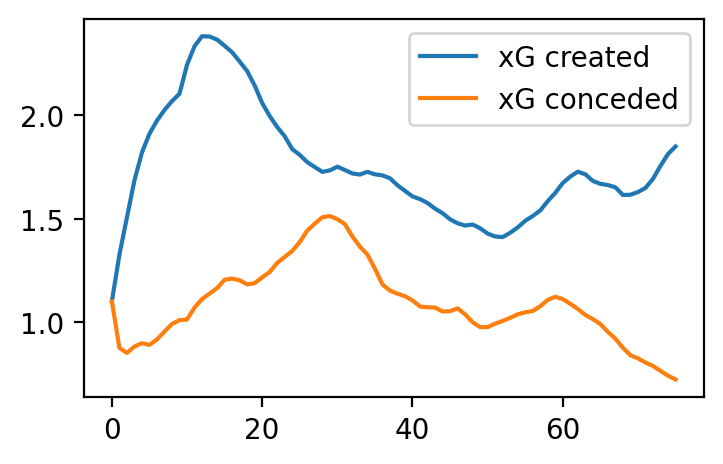

In [47]:
fig = plt.figure(figsize=(4, 2.5), dpi=200)
ax = plt.subplot(111)

ax.plot(X, Y_for, label="xG created")
ax.plot(X, Y_ag, label="xG conceded")

ax.legend()

we'll start by styling the ticks and spines of our figure to give it a more minimalistic look

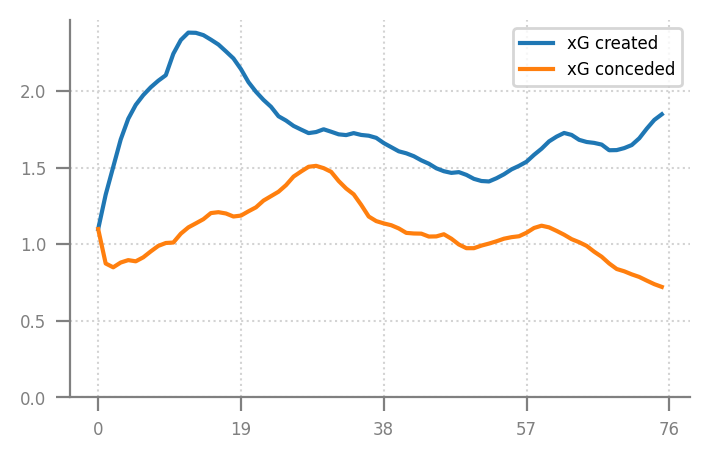

In [48]:
from shutil import which


fig = plt.figure(figsize=(4, 2.5), dpi=200)
ax = plt.subplot(111)

# remove top and right spines and change the color
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color("grey")

# set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

ax.plot(X, Y_for, label="xG created")
ax.plot(X, Y_ag, label="xG conceded")

# customize the ticks to match spinecolor and adjust label size
ax.tick_params(
    color = "grey",
    length = 5,
    which = "major",
    labelsize = 6,
    labelcolor = "grey"
)

# set x-axis major tick positions to only 19 game multiples
ax.xaxis.set_major_locator(ticker.MultipleLocator(19))
# set y-axis major tick positions to only 0.5xG multiples
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

ax.set_ylim(0)

ax.legend(fontsize=6)

fill between the lines

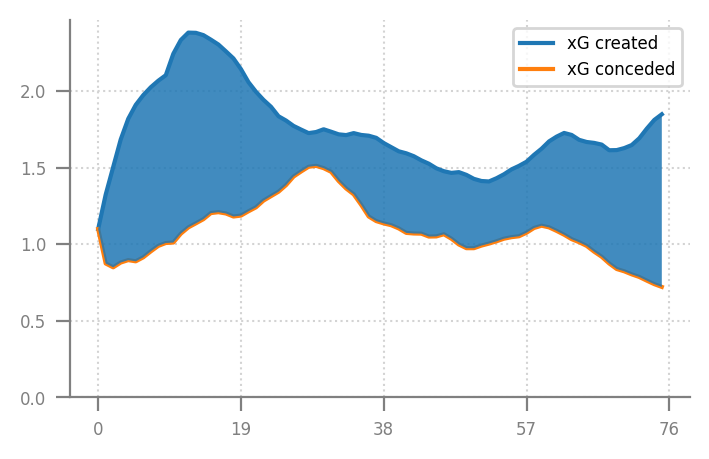

In [49]:
fig = plt.figure(figsize=(4, 2.5), dpi=200)
ax = plt.subplot(111)

# remove top and right spines and change the color
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color("grey")

# set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

ax.plot(X, Y_for, label="xG created")
ax.plot(X, Y_ag, label="xG conceded")

# fill between
ax.fill_between(
    X,
    Y_ag['value'],
    Y_for['value'],
    where = Y_for['value'] > Y_ag['value'],
    interpolate = True,
    alpha = 0.85,
    zorder = 3
)

ax.fill_between(
    X,
    Y_ag['value'],
    Y_for['value'],
    where = Y_ag['value'] > Y_for['value'],
    interpolate = True,
    alpha = 0.85,
)

# customize the ticks to match spinecolor and adjust label size
ax.tick_params(
    color = "grey",
    length = 5,
    which = "major",
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)

# set x-axis major tick positions to only 19 game multiples
ax.xaxis.set_major_locator(ticker.MultipleLocator(19))
# set y-axis major tick positions to only 0.5xG multiples
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

ax.set_ylim(0)

ax.legend(fontsize=6)

text elements and legends

the first thing you should be aware of is the type of coordinate system you're using to annotate and add text to your visuals. In essence, matplotlib has four different coordinate systems which you can interchange and transform to gain more control in your visual customization journey, these are data, axes, figure and display coordinates

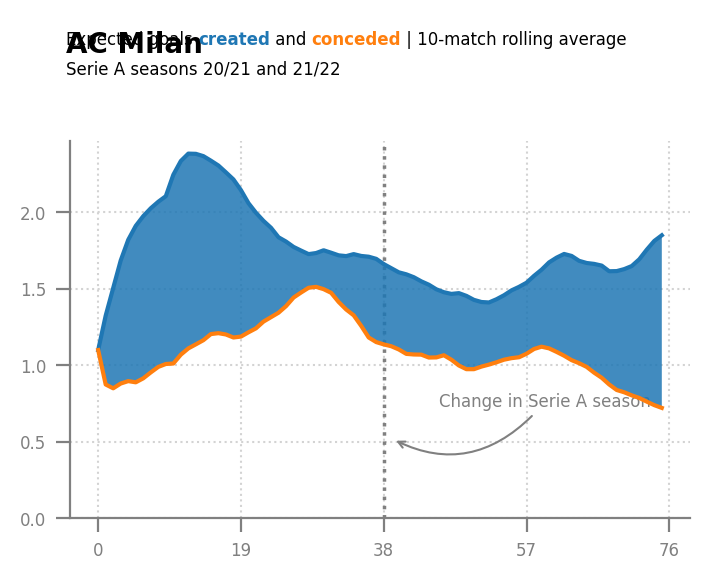

In [52]:
fig = plt.figure(figsize=(4, 2.5), dpi=200)
ax = plt.subplot(111)

# remove top and right spines and change the color
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color("grey")

# set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

line_1 = ax.plot(X, Y_for, zorder=4)
line_2 = ax.plot(X, Y_ag, zorder=4)

ax.set_ylim(0)
# add a line to mark the division between seasons
ax.plot(
    [38,38], # 38 games per season
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls = ":",
    lw = 1.25,
    color = "grey",
    zorder = 2
)

# annotation with data coordinates and offset points
ax.annotate(
    xy = (38, .55),
    xytext = (20, 10),
    textcoords = 'offset points',
    text = 'Change in Serie A season',
    size = 6,
    color = "grey",
    arrowprops = dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="grey", linewidth=0.75,
        connectionstyle="angle3,angleA=50,angleB=-30"
    ) # arrow to connect annotation
)

# fill between
ax.fill_between(
    X,
    Y_ag['value'],
    Y_for['value'],
    where = Y_for['value'] > Y_ag['value'],
    interpolate = True,
    alpha = 0.85,
    zorder = 3
)

ax.fill_between(
    X,
    Y_ag['value'],
    Y_for['value'],
    where = Y_ag['value'] > Y_for['value'],
    interpolate = True,
    alpha = 0.85,
)

# customize the ticks to match spinecolor and adjust label size
ax.tick_params(
    color = "grey",
    length = 5,
    which = "major",
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)

# set x-axis major tick positions to only 19 game multiples
ax.xaxis.set_major_locator(ticker.MultipleLocator(19))
# set y-axis major tick positions to only 0.5xG multiples
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# title and subtitle for the legend
fig_text(
    x = 0.12, y = 1.1,
    s = "AC Milan",
    color = "black",
    weight = "bold",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 1.1,
    s = "Expected goals <created> and <conceded> | 10-match rolling average \nSerie A seasons 20/21 and 21/22",
    highlight_textprops=[
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color = "black",
    size = 6,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

final touches

we'll scrape Fotmob's website and plot the image directly into our visual

In [53]:
from PIL import Image
import urllib

the last thing left to do is create a new axes object to draw the image

In [54]:
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([0.01, .95, 0.11, 0.11], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}8564.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

(-0.5, 191.5, 191.5, -0.5)

(-0.5, 191.5, 191.5, -0.5)

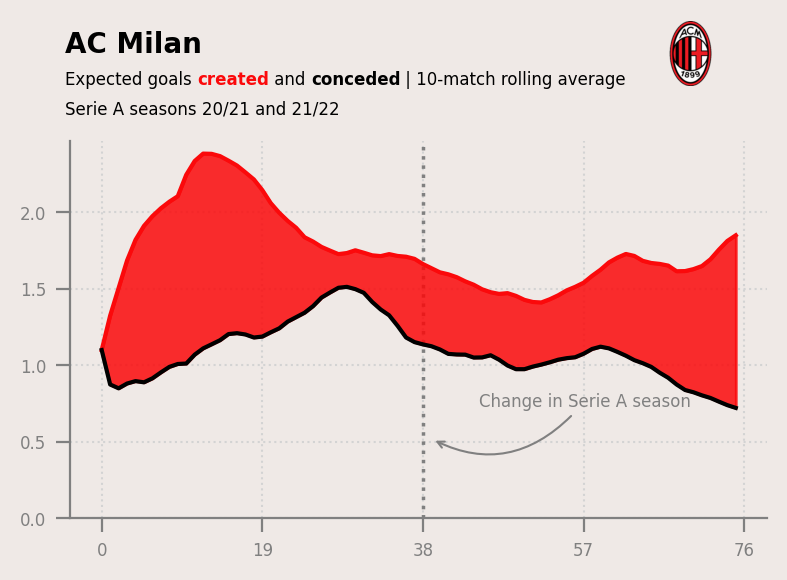

In [59]:
fig = plt.figure(figsize=(4.5, 2.5), dpi=200, facecolor="#EFE9E6")
ax = plt.subplot(111, facecolor="#EFE9E6")

# remove top and right spines and change the color
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color("grey")

# set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

line_1 = ax.plot(X, Y_for, color="#FB090B", zorder=4)
line_2 = ax.plot(X, Y_ag, color="#000000", zorder=4)

ax.set_ylim(0)
# add a line to mark the division between seasons
ax.plot(
    [38,38], # 38 games per season
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls = ":",
    lw = 1.25,
    color = "grey",
    zorder = 2
)

# annotation with data coordinates and offset points
ax.annotate(
    xy = (38, .55),
    xytext = (20, 10),
    textcoords = 'offset points',
    text = 'Change in Serie A season',
    size = 6,
    color = "grey",
    arrowprops = dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="grey", linewidth=0.75,
        connectionstyle="angle3,angleA=50,angleB=-30"
    ) # arrow to connect annotation
)

# fill between
ax.fill_between(
    X,
    Y_ag['value'],
    Y_for['value'],
    where = Y_for['value'] > Y_ag['value'],
    interpolate = True,
    alpha = 0.85,
    zorder = 3,
    color = line_1[0].get_color()
)

ax.fill_between(
    X,
    Y_ag['value'],
    Y_for['value'],
    where = Y_ag['value'] > Y_for['value'],
    interpolate = True,
    alpha = 0.85,
    color = line_2[0].get_color()
)

# customize the ticks to match spinecolor and adjust label size
ax.tick_params(
    color = "grey",
    length = 5,
    which = "major",
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)

# set x-axis major tick positions to only 19 game multiples
ax.xaxis.set_major_locator(ticker.MultipleLocator(19))
# set y-axis major tick positions to only 0.5xG multiples
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# title and subtitle for the legend
fig_text(
    x = 0.12, y = 1.1,
    s = "AC Milan",
    color = "black",
    weight = "bold",
    size = 10,
    family = "DM Sans",
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 1.02,
    s = "Expected goals <created> and <conceded> | 10-match rolling average \nSerie A seasons 20/21 and 21/22",
    highlight_textprops=[
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color = "black",
    size = 6,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([0.75, .99, 0.13, 0.13], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}8564.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

save fig

In [61]:
fig.savefig('../figures/ACM-xG-rolling-plot.png', bbox_inches='tight')

acmilan color palette

1
#FB090B
#000000

2
#ffffff
#e11624
#b52e2b
#46433f
#1a161a

(-0.5, 191.5, 191.5, -0.5)

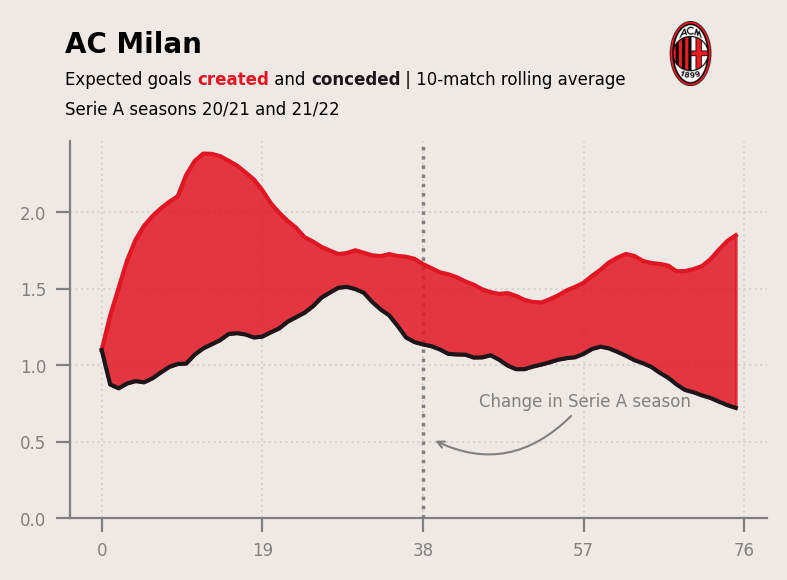

In [62]:
fig = plt.figure(figsize=(4.5, 2.5), dpi=200, facecolor="#EFE9E6")
ax = plt.subplot(111, facecolor="#EFE9E6")

# remove top and right spines and change the color
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color("grey")

# set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

line_1 = ax.plot(X, Y_for, color="#e11624", zorder=4)
line_2 = ax.plot(X, Y_ag, color="#1a161a", zorder=4)

ax.set_ylim(0)
# add a line to mark the division between seasons
ax.plot(
    [38,38], # 38 games per season
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls = ":",
    lw = 1.25,
    color = "grey",
    zorder = 2
)

# annotation with data coordinates and offset points
ax.annotate(
    xy = (38, .55),
    xytext = (20, 10),
    textcoords = 'offset points',
    text = 'Change in Serie A season',
    size = 6,
    color = "grey",
    arrowprops = dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="grey", linewidth=0.75,
        connectionstyle="angle3,angleA=50,angleB=-30"
    ) # arrow to connect annotation
)

# fill between
ax.fill_between(
    X,
    Y_ag['value'],
    Y_for['value'],
    where = Y_for['value'] > Y_ag['value'],
    interpolate = True,
    alpha = 0.85,
    zorder = 3,
    color = line_1[0].get_color()
)

ax.fill_between(
    X,
    Y_ag['value'],
    Y_for['value'],
    where = Y_ag['value'] > Y_for['value'],
    interpolate = True,
    alpha = 0.85,
    color = line_2[0].get_color()
)

# customize the ticks to match spinecolor and adjust label size
ax.tick_params(
    color = "grey",
    length = 5,
    which = "major",
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)

# set x-axis major tick positions to only 19 game multiples
ax.xaxis.set_major_locator(ticker.MultipleLocator(19))
# set y-axis major tick positions to only 0.5xG multiples
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# title and subtitle for the legend
fig_text(
    x = 0.12, y = 1.1,
    s = "AC Milan",
    color = "black",
    weight = "bold",
    size = 10,
    family = "DM Sans",
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 1.02,
    s = "Expected goals <created> and <conceded> | 10-match rolling average \nSerie A seasons 20/21 and 21/22",
    highlight_textprops=[
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color = "black",
    size = 6,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([0.75, .99, 0.13, 0.13], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}8564.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

In [63]:
fig.savefig('../figures/ACM-xG-rolling-plot2.png', bbox_inches='tight')